In [1]:
pip install yfinance


In [5]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm 


In [16]:
tickers = ['AAPL', 'NMS', 'C', 'DIS', 'F', 'MSFT', 'MS', 'GME', 'TSLA', 'AMZN']
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [17]:
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

df = yf.download(tickers, start, end)['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [18]:
df

,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,NMS,TSLA
Date,,,,,,,,,,
2019-01-02,37.943249,76.956497,45.191227,107.654335,6.451035,3.160276,35.041664,96.218155,10.156167,20.674667
2019-01-03,34.163834,75.014000,44.372337,105.046211,6.353046,3.136097,34.417145,92.678505,10.230122,20.024000
2019-01-04,35.622250,78.769501,46.542000,108.286606,6.598021,3.684974,35.822289,96.988907,10.238341,21.179333
2019-01-07,35.542969,81.475502,46.947231,109.225136,6.769504,3.743005,36.177910,97.112610,10.312292,22.330667
2019-01-08,36.220524,82.829002,46.820583,110.074760,6.834832,3.822798,35.952393,97.816734,10.304072,22.356667
...,...,...,...,...,...,...,...,...,...,...
2023-09-28,170.690002,125.980003,41.200001,80.129997,12.560000,16.840000,82.190002,313.640015,9.750000,246.380005
2023-09-29,171.210007,127.120003,41.130001,81.050003,12.420000,16.459999,81.669998,315.750000,9.750000,250.220001
2023-10-02,173.750000,129.460007,40.500000,81.669998,12.310000,15.390000,80.410004,321.799988,9.670000,251.600006


In [21]:
returns = df.pct_change()
returns

,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,NMS,TSLA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.025241,-0.018121,-0.024227,-0.015190,-0.007651,-0.017822,-0.036788,0.007282,-0.031472
2019-01-04,0.042689,0.050064,0.048897,0.030847,0.038560,0.175019,0.040827,0.046509,0.000803,0.057697
2019-01-07,-0.002226,0.034353,0.008707,0.008667,0.025990,0.015748,0.009927,0.001275,0.007223,0.054361
2019-01-08,0.019063,0.016612,-0.002698,0.007779,0.009650,0.021318,-0.006234,0.007251,-0.000797,0.001164
...,...,...,...,...,...,...,...,...,...,...
2023-09-28,0.001526,0.000000,0.018290,0.002879,0.013721,-0.018076,0.006614,0.002717,-0.003475,0.024449
2023-09-29,0.003046,0.009049,-0.001699,0.011481,-0.011147,-0.022565,-0.006327,0.006727,0.000000,0.015586
2023-10-02,0.014836,0.018408,-0.015317,0.007650,-0.008857,-0.065006,-0.015428,0.019161,-0.008205,0.005515


In [22]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,C,DIS,F,GME,MS,MSFT,NMS,TSLA
AAPL,0.000428,0.000288,0.000238,0.000208,0.000226,0.000321,0.000250,0.000307,0.000037,0.000420
AMZN,0.000288,0.000501,0.000172,0.000205,0.000182,0.000280,0.000184,0.000301,0.000018,0.000411
C,0.000238,0.000172,0.000619,0.000322,0.000404,0.000414,0.000461,0.000221,0.000056,0.000318
DIS,0.000208,0.000205,0.000322,0.000455,0.000301,0.000252,0.000292,0.000209,0.000039,0.000283
F,0.000226,0.000182,0.000404,0.000301,0.000745,0.000500,0.000366,0.000200,0.000049,0.000385
GME,0.000321,0.000280,0.000414,0.000252,0.000500,0.008891,0.000293,0.000241,0.000028,0.000691
MS,0.000250,0.000184,0.000461,0.000292,0.000366,0.000293,0.000502,0.000238,0.000052,0.000298
MSFT,0.000307,0.000301,0.000221,0.000209,0.000200,0.000241,0.000238,0.000380,0.000042,0.000371
NMS,0.000037,0.000018,0.000056,0.000039,0.000049,0.000028,0.000052,0.000042,0.000119,0.000033
TSLA,0.000420,0.000411,0.000318,0.000283,0.000385,0.000691,0.000298,0.000371,0.000033,0.001705


In [23]:
avg_returns = returns.mean()

avg_returns

AAPL    0.001486
AMZN    0.000669
C       0.000204
DIS    -0.000028
F       0.000888
GME     0.005079
MS      0.000930
MSFT    0.001192
NMS     0.000017
TSLA    0.002973
dtype: float64

In [25]:
count = returns.count()[0]
count

C:\Users\tejal\AppData\Local\Temp\ipykernel_25328\3364445099.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = returns.count()[0]


1197

In [26]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weights.T @ cov_matrix @ weights)

In [27]:
port_mean

0.0013408197747360896

In [28]:
port_std

0.019275213124927186

In [35]:
x = np.arange(-0.05,0.055,0.001)
x
norm_dist = norm.pdf(x, port_mean, port_std)
norm_dist

array([ 0.59612938,  0.68354881,  0.78168111,  0.89149883,  1.01401182,
        1.15026083,  1.30130987,  1.4682371 ,  1.65212438,  1.85404539,
        2.07505237,  2.3161615 ,  2.57833707,  2.86247448,  3.16938232,
        3.49976364,  3.85419671,  4.23311547,  4.63679004,  5.06530759,
        5.51855394,  5.99619624,  6.49766716,  7.02215095,  7.56857184,
        8.13558508,  8.72157103,  9.32463261,  9.94259648, 10.5730181 ,
       11.21319085, 11.86015948, 12.51073777, 13.16153037, 13.80895888,
       14.44929172, 15.07867772, 15.69318288, 16.28882995, 16.86164029,
       17.40767732, 17.9230911 , 18.4041631 , 18.8473507 , 19.2493304 ,
       19.60703929, 19.91771382, 20.17892537, 20.3886118 , 20.5451046 ,
       20.64715098, 20.69393055, 20.68506632, 20.62062979, 20.50113991,
       20.32755622, 20.10126593, 19.82406552, 19.49813695, 19.12601911,
       18.71057488, 18.25495447, 17.76255574, 17.2369821 , 16.68199874,
       16.10148807, 15.49940484, 14.87973191, 14.24643719, 13.60

<function matplotlib.pyplot.show(close=None, block=None)>

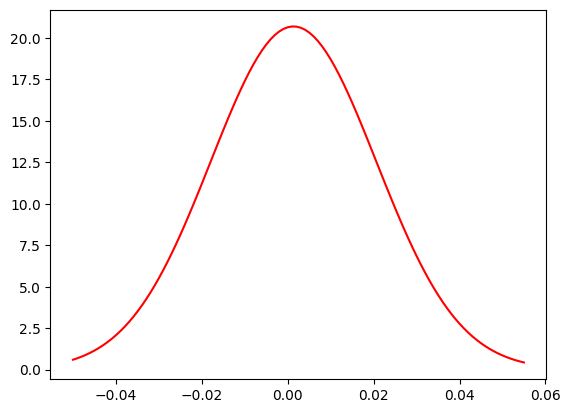

In [36]:
plt.plot(x,norm_dist, color = 'r')
plt.show

In [37]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, port_mean, port_std)

VaR

-0.03036408444406303

In [38]:
num_days = 5

VaR * np.sqrt(num_days)

-0.06789615689146884

In [39]:
lower = port_mean - 2 * port_std / np.sqrt(count)

higher = port_mean + 2 * port_std /np.sqrt(count)

In [40]:
lower

0.0002265711437143209

In [41]:
higher

0.0024550684057578582